In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("train.csv")

# Display column names
print("Columns in dataset:", df.columns)

# Show basic info
print(df.info())

Columns in dataset: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 

In [10]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing postal codes with 0 (or any other logical value)
df["Postal Code"] = df["Postal Code"].fillna(0)
# Convert Order Date & Ship Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y", errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y", errors="coerce")

# Check basic statistics
print(df.describe())

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
            Row ID                     Order Date  \
count  9800.000000                           9800   
mean   4900.500000  2017-05-01 05:13:51.673469440   
min       1.000000            2015-01-03 00:00:00   
25%    2450.750000            2016-05-24 00:00:00   
50%    4900.500000            2017-06-26 00:00:00   
75%    7350.250000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2829.160653                            NaN   

                           Ship Date   Postal Code         Sales  
count                           9800   9800.000000   9800.000000  
mean   2017-05-0

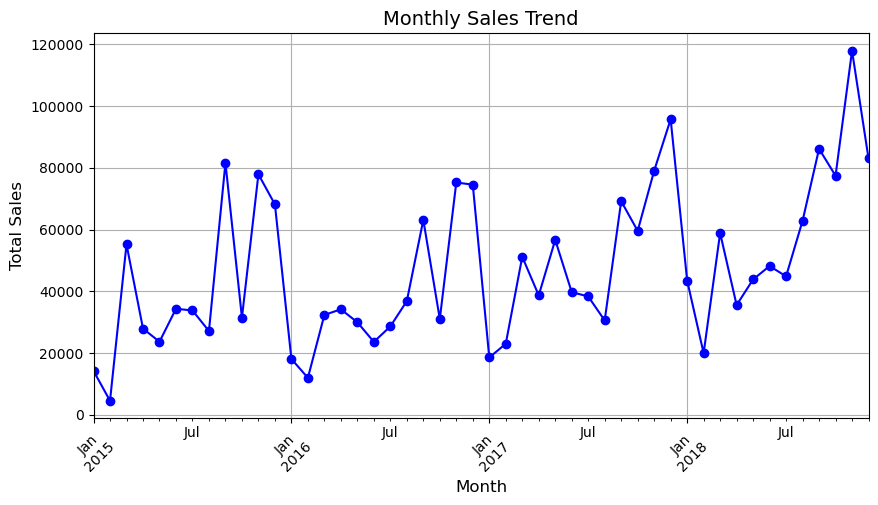

In [13]:
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="o", linestyle="-", color="blue")

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


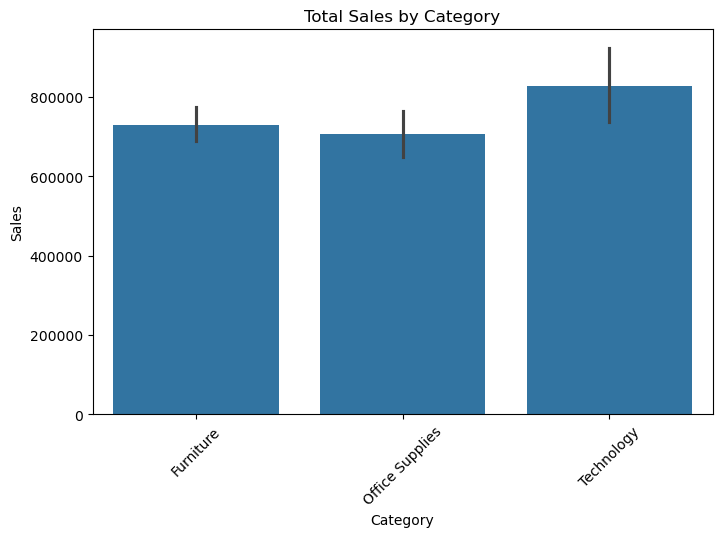

In [14]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

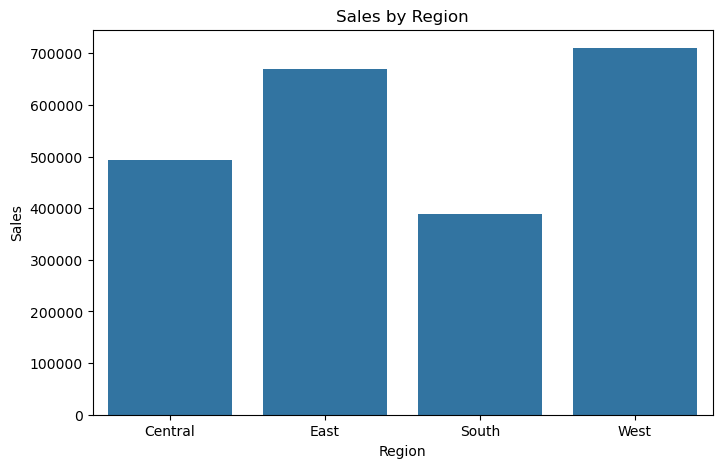

In [15]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=region_sales)
plt.title("Sales by Region")
plt.show()

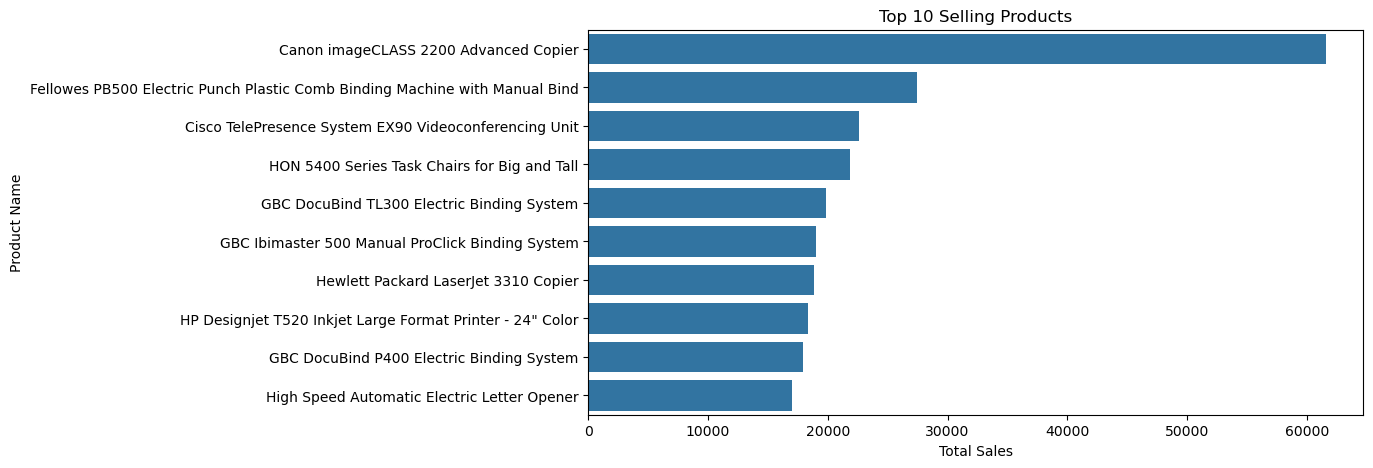

In [16]:
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y="Product Name", x="Sales", data=top_products)
plt.title("Top 10 Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

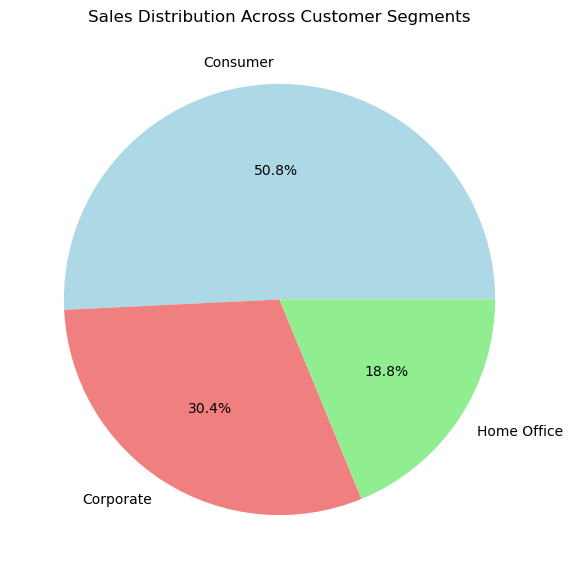

In [17]:
customer_segments = df.groupby("Segment")["Sales"].sum()

plt.figure(figsize=(7,7))
customer_segments.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Sales Distribution Across Customer Segments")
plt.ylabel("")  # Hides default y-axis label
plt.show()